In [ ]:
import tensorflow as tf
import pandas as pd
from sklearn.model_selection import train_test_split
from tensorflow.keras.applications import MobileNetV2
from tensorflow.keras.layers import Dense, GlobalAveragePooling2D
from tensorflow.keras.models import Model
from tensorflow.keras.optimizers import Adam
import matplotlib.pyplot as plt

# Define the paths
dataset_path = '/home/cougarnet.uh.edu/tbahiru/Documents/data/orginal/'
csv_file = dataset_path + 'FairFace.csv'
images_path = dataset_path + 'FairFace/'

# Load the dataset
df = pd.read_csv(csv_file)

# Map file names to their respective paths
df['file_path'] = images_path + df['file']

# Split the dataset into training and validation sets
train_df, valid_df = train_test_split(df, test_size=0.2, random_state=42)

In [ ]:

# Function to preprocess images
def preprocess_image(file_path, label):
    image = tf.io.read_file(file_path)
    image = tf.image.decode_jpeg(image, channels=3)
    image = tf.image.resize(image, [224, 224])
    image = image / 255.0
    return image, label

# Function to create a dataset from a DataFrame
def df_to_dataset(dataframe, shuffle=True, batch_size=32):
    df = dataframe.copy()
    labels = df['gender'].map({'Male': 0, 'Female': 1}).values
    ds = tf.data.Dataset.from_tensor_slices((df['file_path'].values, labels))
    ds = ds.map(preprocess_image)
    if shuffle:
        ds = ds.shuffle(buffer_size=len(dataframe))
    ds = ds.batch(batch_size)
    ds = ds.prefetch(buffer_size=tf.data.AUTOTUNE)
    return ds

# Create training and validation datasets
train_dataset = df_to_dataset(train_df, shuffle=True, batch_size=32)
validation_dataset = df_to_dataset(valid_df, shuffle=False, batch_size=32)

### Step 2: Define and Compile the Model
base_model = MobileNetV2(weights='imagenet', include_top=False, input_shape=(224, 224, 3))
base_model.trainable = False  # Freeze the convolutional base

x = base_model.output
x = GlobalAveragePooling2D()(x)
x = Dense(1024, activation='relu')(x)
predictions = Dense(1, activation='sigmoid')(x)

model = Model(inputs=base_model.input, outputs=predictions)
model.compile(optimizer=Adam(learning_rate=0.0001), loss='binary_crossentropy', metrics=['accuracy'])


2024-05-01 12:02:49.375426: I tensorflow/core/platform/cpu_feature_guard.cc:210] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.
2024-05-01 12:02:50.455097: W tensorflow/compiler/tf2tensorrt/utils/py_utils.cc:38] TF-TRT Warning: Could not find TensorRT
2024-05-01 12:02:53.127759: I external/local_xla/xla/stream_executor/cuda/cuda_executor.cc:998] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero. See more at https://github.com/torvalds/linux/blob/v6.0/Documentation/ABI/testing/sysfs-bus-pci#L344-L355
2024-05-01 12:02:53.430958: I external/local_xla/xla/stream_executor/cuda/cuda_executor.cc:998] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero. 

Epoch 1/10


I0000 00:00:1714582980.639735    3134 service.cc:145] XLA service 0x759674003650 initialized for platform CUDA (this does not guarantee that XLA will be used). Devices:
I0000 00:00:1714582980.639764    3134 service.cc:153]   StreamExecutor device (0): NVIDIA GeForce RTX 3060, Compute Capability 8.6
2024-05-01 12:03:00.747303: I tensorflow/compiler/mlir/tensorflow/utils/dump_mlir_util.cc:268] disabling MLIR crash reproducer, set env var `MLIR_CRASH_REPRODUCER_DIRECTORY` to enable.
2024-05-01 12:03:01.273006: I external/local_xla/xla/stream_executor/cuda/cuda_dnn.cc:465] Loaded cuDNN version 8907
I0000 00:00:1714582982.084603    3197 asm_compiler.cc:369] ptxas warning : Registers are spilled to local memory in function 'triton_gemm_dot_1370', 244 bytes spill stores, 244 bytes spill loads

I0000 00:00:1714582982.097958    3199 asm_compiler.cc:369] ptxas warning : Registers are spilled to local memory in function 'triton_gemm_dot_4272', 32 bytes spill stores, 32 bytes spill loads

I0000 00

   7/1613 ━━━━━━━━━━━━━━━━━━━━ 36s 23ms/step - accuracy: 0.5337 - loss: 0.7559 

I0000 00:00:1714582987.296583    3134 device_compiler.h:188] Compiled cluster using XLA!  This line is logged at most once for the lifetime of the process.


1612/1613 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step - accuracy: 0.7031 - loss: 0.5607

I0000 00:00:1714583023.906271    3369 asm_compiler.cc:369] ptxas warning : Registers are spilled to local memory in function 'triton_gemm_dot_1370', 260 bytes spill stores, 260 bytes spill loads

I0000 00:00:1714583023.966822    3373 asm_compiler.cc:369] ptxas warning : Registers are spilled to local memory in function 'triton_gemm_dot_4272', 40 bytes spill stores, 40 bytes spill loads

I0000 00:00:1714583023.999922    3384 asm_compiler.cc:369] ptxas warning : Registers are spilled to local memory in function 'triton_gemm_dot_4272', 4 bytes spill stores, 4 bytes spill loads

I0000 00:00:1714583024.041225    3379 asm_compiler.cc:369] ptxas warning : Registers are spilled to local memory in function 'triton_gemm_dot_4272', 32 bytes spill stores, 32 bytes spill loads



1613/1613 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step - accuracy: 0.7031 - loss: 0.5606

I0000 00:00:1714583037.472676    3762 asm_compiler.cc:369] ptxas warning : Registers are spilled to local memory in function 'triton_gemm_dot_1159', 24 bytes spill stores, 24 bytes spill loads



1613/1613 ━━━━━━━━━━━━━━━━━━━━ 66s 33ms/step - accuracy: 0.7031 - loss: 0.5606 - val_accuracy: 0.7487 - val_loss: 0.5007
Epoch 2/10
1613/1613 ━━━━━━━━━━━━━━━━━━━━ 50s 27ms/step - accuracy: 0.7610 - loss: 0.4867 - val_accuracy: 0.7599 - val_loss: 0.4829
Epoch 3/10
1613/1613 ━━━━━━━━━━━━━━━━━━━━ 51s 28ms/step - accuracy: 0.7801 - loss: 0.4577 - val_accuracy: 0.7623 - val_loss: 0.4755
Epoch 4/10
1613/1613 ━━━━━━━━━━━━━━━━━━━━ 50s 27ms/step - accuracy: 0.7951 - loss: 0.4327 - val_accuracy: 0.7466 - val_loss: 0.5049
Epoch 5/10
1613/1613 ━━━━━━━━━━━━━━━━━━━━ 51s 28ms/step - accuracy: 0.8107 - loss: 0.4101 - val_accuracy: 0.7668 - val_loss: 0.4766
Epoch 6/10
1613/1613 ━━━━━━━━━━━━━━━━━━━━ 50s 27ms/step - accuracy: 0.8281 - loss: 0.3827 - val_accuracy: 0.7701 - val_loss: 0.4669
Epoch 7/10
1613/1613 ━━━━━━━━━━━━━━━━━━━━ 50s 27ms/step - accuracy: 0.8455 - loss: 0.3548 - val_accuracy: 0.7646 - val_loss: 0.4745
Epoch 8/10
1613/1613 ━━━━━━━━━━━━━━━━━━━━ 50s 27ms/step - accuracy: 0.8616 - loss: 0.32

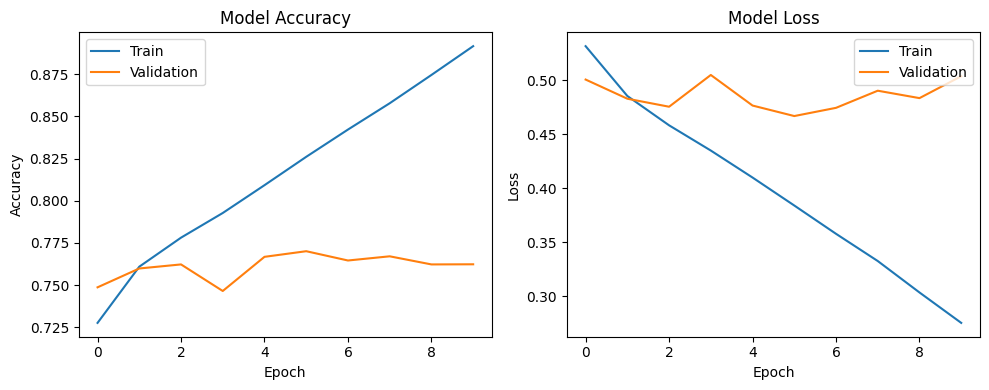

In [1]:
### Step 3: Train the Model
history = model.fit(train_dataset, epochs=10, validation_data=validation_dataset)

### Step 4: Visualization and Saving the Model
# Plot training & validation accuracy values
plt.figure(figsize=(10, 4))
plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left')

# Plot training & validation loss values
plt.subplot(1, 2, 2)
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model Loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper right')
plt.tight_layout()
plt.show()

model.save(dataset_path + 'my_model.h5')


2024-04-27 22:10:17.580227: W external/local_tsl/tsl/framework/cpu_allocator_impl.cc:83] Allocation of 6595534848 exceeds 10% of free system memory.
2024-04-27 22:10:23.227664: W external/local_tsl/tsl/framework/cpu_allocator_impl.cc:83] Allocation of 6595534848 exceeds 10% of free system memory.


343/343 ━━━━━━━━━━━━━━━━━━━━ 8s 20ms/step
Overall Accuracy: 0.7669344531677926


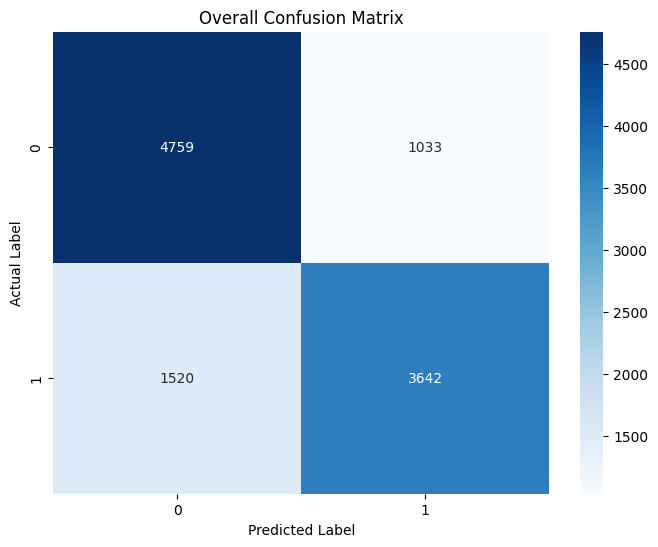

5/5 ━━━━━━━━━━━━━━━━━━━━ 1s 169ms/step
Accuracy for 3-9, East Asian, Male: 0.781021897810219


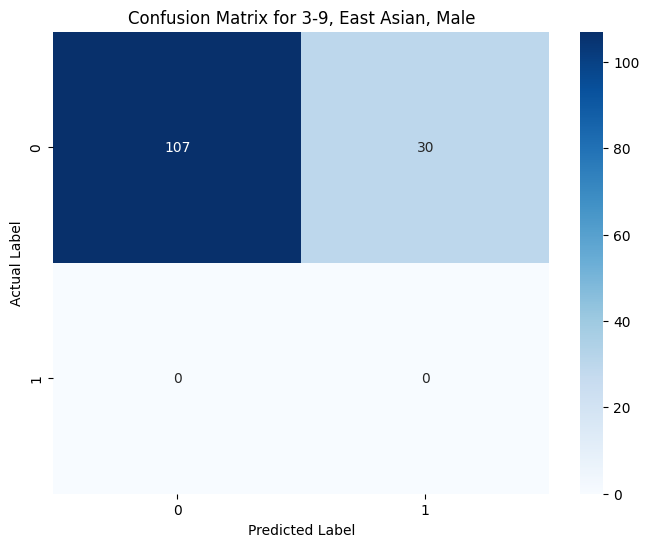

I0000 00:00:1714273836.876003 2129137 asm_compiler.cc:369] ptxas warning : Registers are spilled to local memory in function 'triton_gemm_dot_1150', 260 bytes spill stores, 260 bytes spill loads



1/1 ━━━━━━━━━━━━━━━━━━━━ 4s 4s/step
Accuracy for 50-59, East Asian, Female: 0.6666666666666666


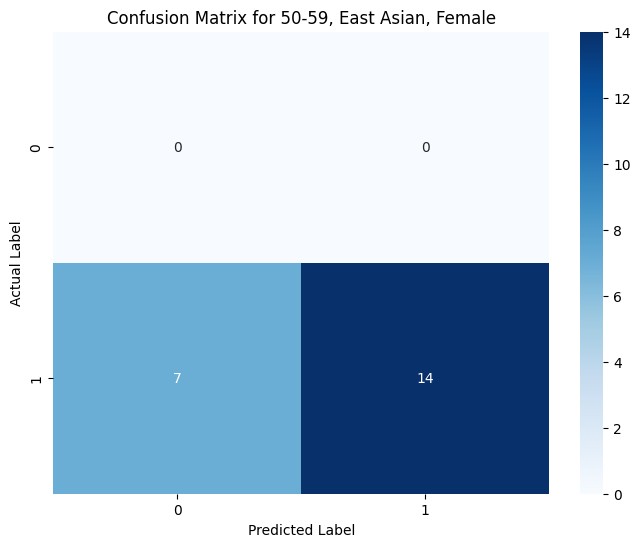

9/9 ━━━━━━━━━━━━━━━━━━━━ 1s 93ms/step
Accuracy for 30-39, White, Male: 0.8587786259541985


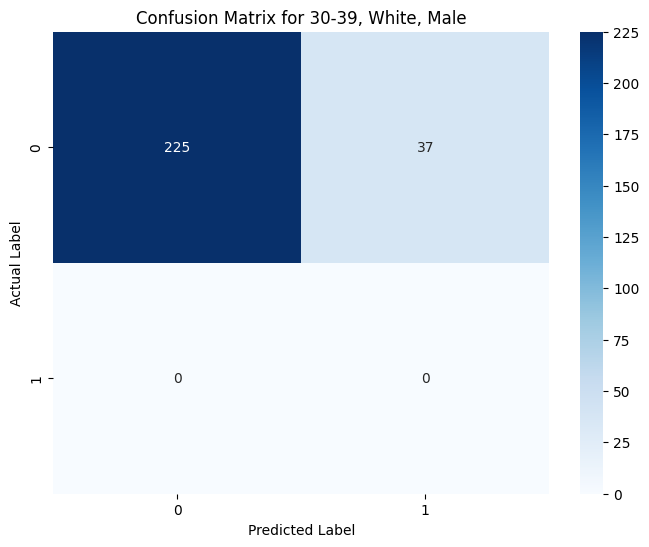

8/8 ━━━━━━━━━━━━━━━━━━━━ 1s 101ms/step
Accuracy for 20-29, Latino_Hispanic, Female: 0.7831325301204819


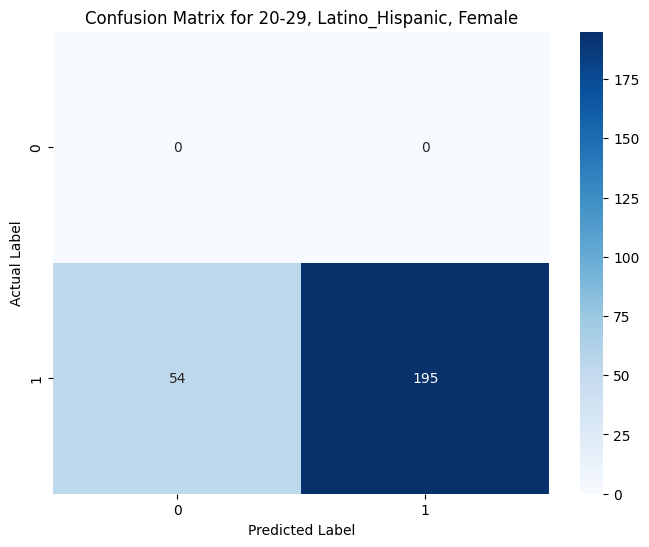

5/7 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step

I0000 00:00:1714273844.559464 2129257 asm_compiler.cc:369] ptxas warning : Registers are spilled to local memory in function 'triton_gemm_dot_1150', 252 bytes spill stores, 252 bytes spill loads



7/7 ━━━━━━━━━━━━━━━━━━━━ 5s 758ms/step
Accuracy for 20-29, Southeast Asian, Male: 0.7727272727272727


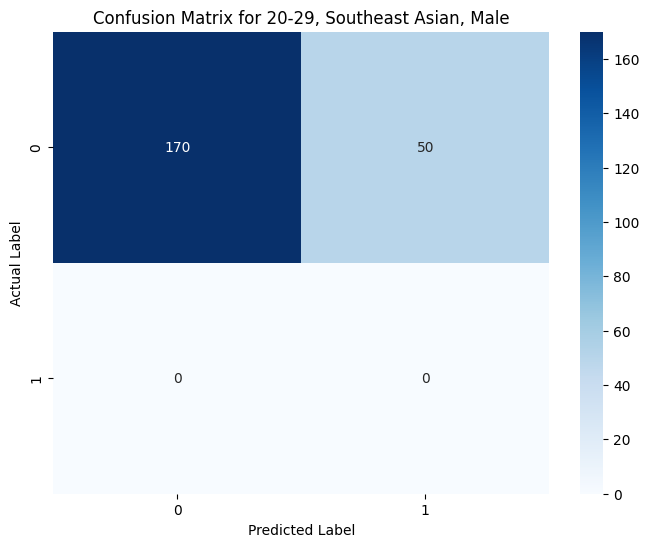

5/6 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step

I0000 00:00:1714273849.579739 2129317 asm_compiler.cc:369] ptxas warning : Registers are spilled to local memory in function 'triton_gemm_dot_1150', 8 bytes spill stores, 8 bytes spill loads



6/6 ━━━━━━━━━━━━━━━━━━━━ 4s 746ms/step
Accuracy for 30-39, Latino_Hispanic, Male: 0.8735632183908046


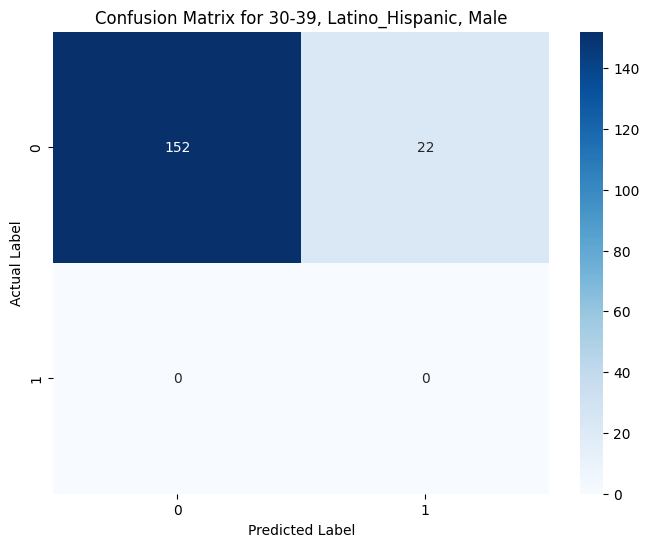

6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step
Accuracy for 20-29, Black, Male: 0.8


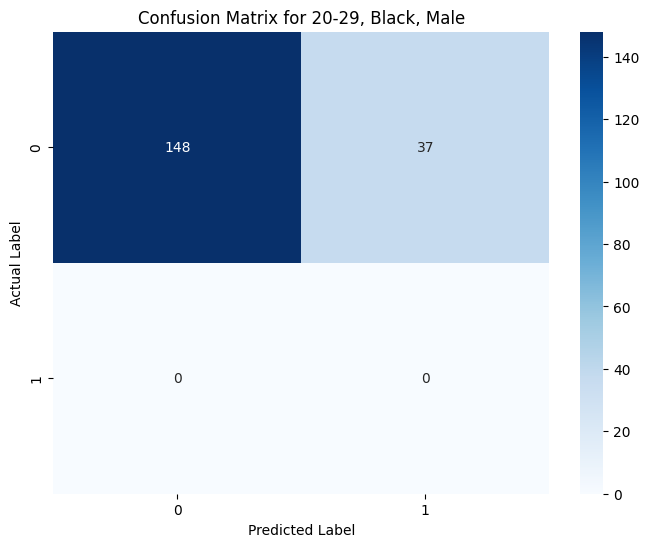

5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step
Accuracy for 3-9, East Asian, Male: 0.781021897810219


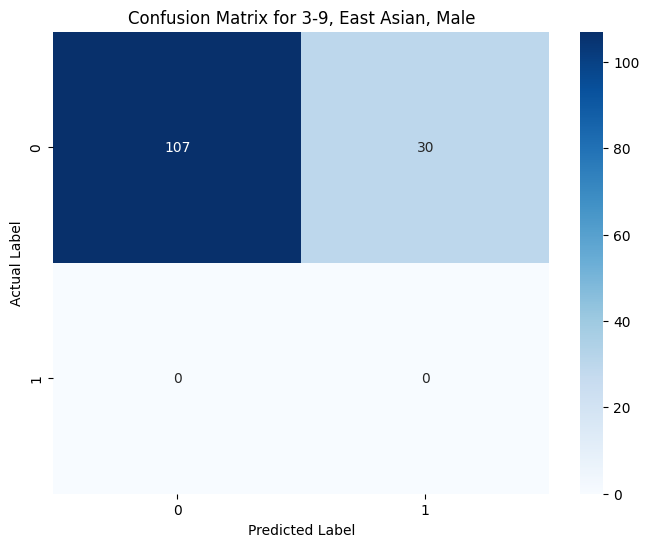

7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step
Accuracy for 20-29, Southeast Asian, Male: 0.7727272727272727


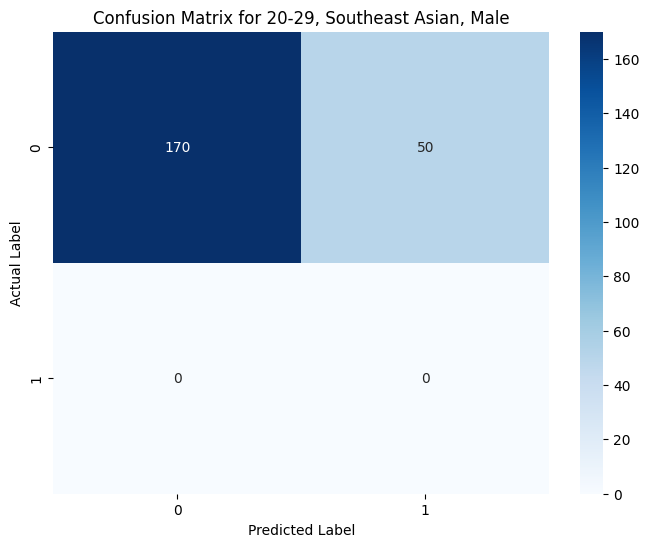

1/4 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step

I0000 00:00:1714273855.667327 2129439 asm_compiler.cc:369] ptxas warning : Registers are spilled to local memory in function 'triton_gemm_dot_1150', 260 bytes spill stores, 260 bytes spill loads



4/4 ━━━━━━━━━━━━━━━━━━━━ 4s 1s/step 
Accuracy for 3-9, Southeast Asian, Male: 0.7610619469026548


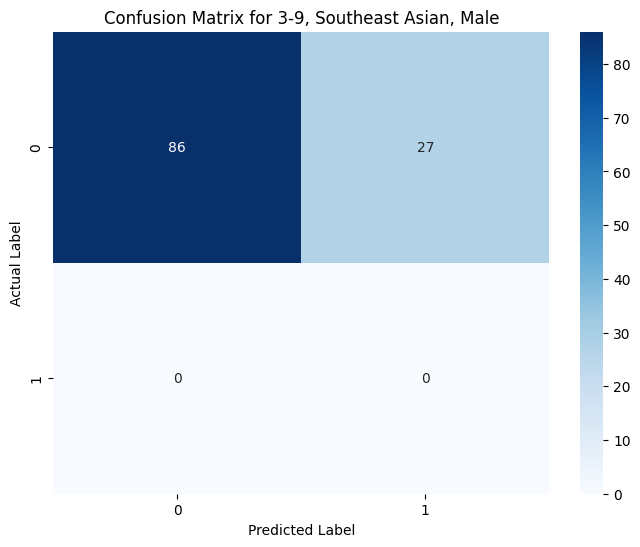

I0000 00:00:1714273859.598948 2129488 asm_compiler.cc:369] ptxas warning : Registers are spilled to local memory in function 'triton_gemm_dot_1150', 8 bytes spill stores, 8 bytes spill loads



1/1 ━━━━━━━━━━━━━━━━━━━━ 3s 3s/step
Accuracy for more than 70, East Asian, Female: 0.14285714285714285


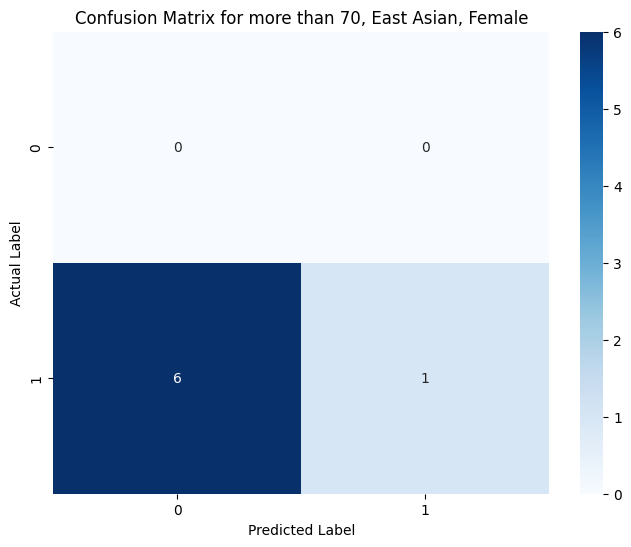

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step
Accuracy for 50-59, East Asian, Female: 0.6666666666666666


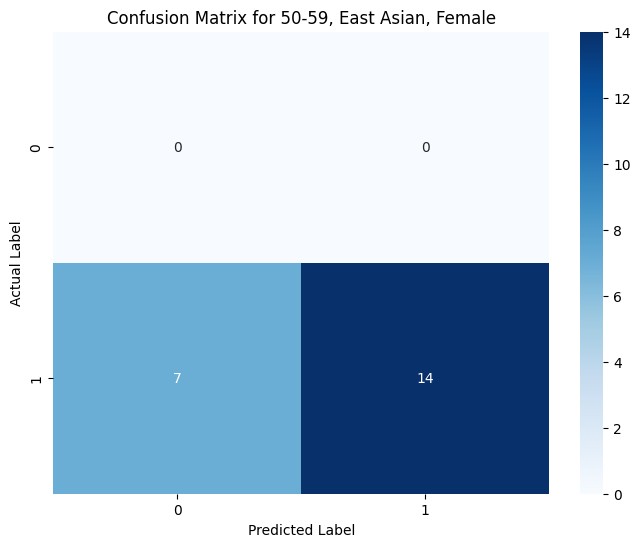

1/3 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step

I0000 00:00:1714273863.596573 2129581 asm_compiler.cc:369] ptxas warning : Registers are spilled to local memory in function 'triton_gemm_dot_1150', 260 bytes spill stores, 260 bytes spill loads



3/3 ━━━━━━━━━━━━━━━━━━━━ 4s 2s/step 
Accuracy for 40-49, Indian, Female: 0.6091954022988506


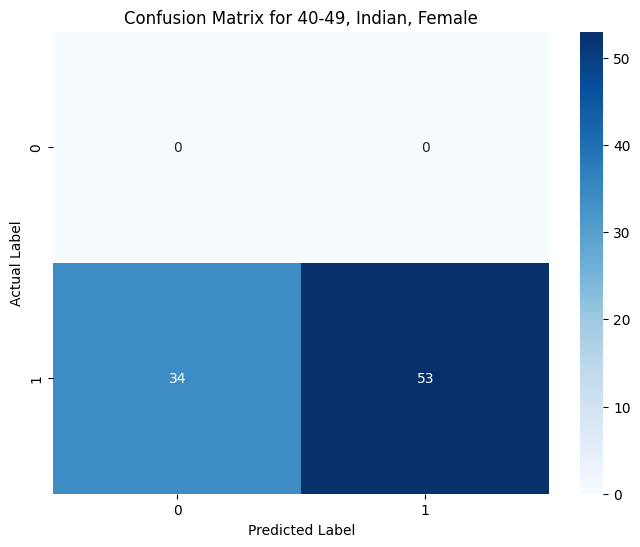

5/6 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step

I0000 00:00:1714273868.284757 2129642 asm_compiler.cc:369] ptxas warning : Registers are spilled to local memory in function 'triton_gemm_dot_1150', 16 bytes spill stores, 16 bytes spill loads



6/6 ━━━━━━━━━━━━━━━━━━━━ 3s 664ms/step
Accuracy for 20-29, Indian, Male: 0.8475609756097561


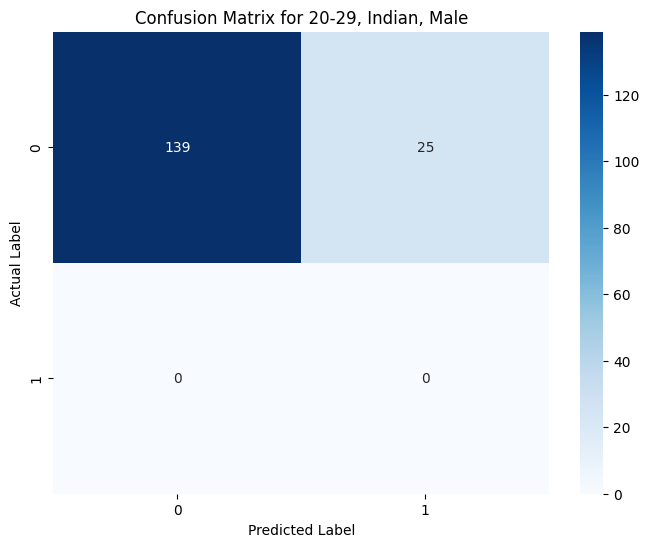

6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step
Accuracy for 30-39, Latino_Hispanic, Female: 0.7530120481927711


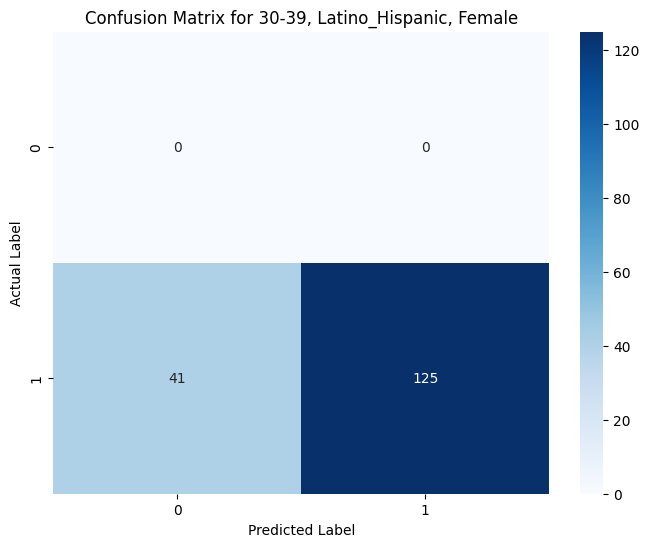

In [6]:
import tensorflow as tf
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix, accuracy_score
import seaborn as sns

# Load the trained model
model = tf.keras.models.load_model(dataset_path + 'my_model.h5')

# Define paths for test data
test_csv_file = dataset_path + 'test.csv'
test_images_path = dataset_path + 'val/'

# Load test dataset
test_df = pd.read_csv(test_csv_file)
test_df['file_path'] = test_images_path + test_df['file']

# Preprocess test images
def preprocess_image(file_path):
    image = tf.io.read_file(file_path)
    image = tf.image.decode_jpeg(image, channels=3)
    image = tf.image.resize(image, [224, 224])
    image = image / 255.0
    return image

# Prepare the test dataset
test_images = np.stack([preprocess_image(fp).numpy() for fp in test_df['file_path']])
test_labels = test_df['gender'].map({'Male': 0, 'Female': 1}).values

# Make predictions
predictions = model.predict(test_images)
predicted_classes = (predictions > 0.5).astype(int).flatten()

# Calculate overall accuracy
overall_accuracy = accuracy_score(test_labels, predicted_classes)
print("Overall Accuracy:", overall_accuracy)

# Confusion matrix for overall accuracy
cm = confusion_matrix(test_labels, predicted_classes)
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.title('Overall Confusion Matrix')
plt.ylabel('Actual Label')
plt.xlabel('Predicted Label')
plt.show()

# Process the first 15 intersectional attributes
for index, row in test_df.head(15).iterrows():
    group_df = test_df[(test_df['age'] == row['age']) & (test_df['race'] == row['race']) & (test_df['gender'] == row['gender'])]
    if not group_df.empty:
        group_images = np.stack([preprocess_image(fp).numpy() for fp in group_df['file_path']])
        group_labels = group_df['gender'].map({'Male': 0, 'Female': 1}).values
        group_predictions = model.predict(group_images)
        group_predicted_classes = (group_predictions > 0.5).astype(int).flatten()
        group_accuracy = accuracy_score(group_labels, group_predicted_classes)
        print(f"Accuracy for {row['age']}, {row['race']}, {row['gender']}: {group_accuracy}")

        # Confusion matrix for the group
        group_cm = confusion_matrix(group_labels, group_predicted_classes)
        plt.figure(figsize=(8, 6))
        sns.heatmap(group_cm, annot=True, fmt='d', cmap='Blues')
        plt.title(f'Confusion Matrix for {row["age"]}, {row["race"]}, {row["gender"]}')
        plt.ylabel('Actual Label')
        plt.xlabel('Predicted Label')
        plt.show()


2024-04-30 22:20:49.146936: W external/local_tsl/tsl/framework/cpu_allocator_impl.cc:83] Allocation of 6595534848 exceeds 10% of free system memory.
2024-04-30 22:20:54.856414: W external/local_tsl/tsl/framework/cpu_allocator_impl.cc:83] Allocation of 6595534848 exceeds 10% of free system memory.


343/343 ━━━━━━━━━━━━━━━━━━━━ 8s 21ms/step
Overall Accuracy: 0.7669344531677926


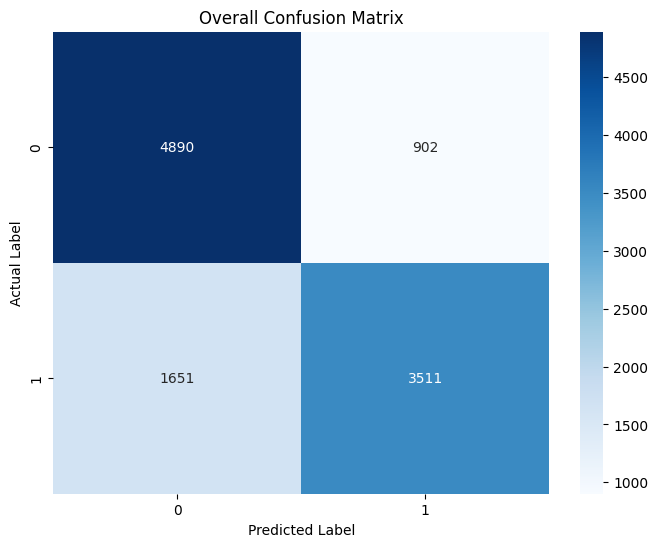

24/24 ━━━━━━━━━━━━━━━━━━━━ 1s 44ms/step
Accuracy for Race: Black, Gender: Female: 0.5402906208718626


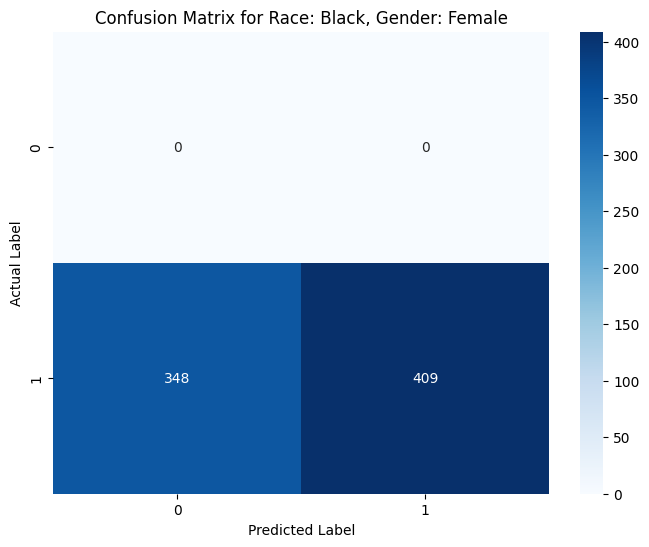

25/25 ━━━━━━━━━━━━━━━━━━━━ 1s 45ms/step
Accuracy for Race: Black, Gender: Male: 0.8197747183979975


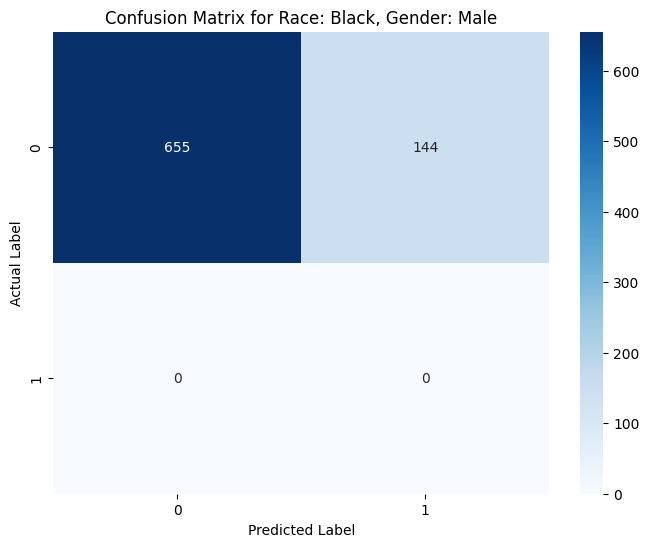

25/25 ━━━━━━━━━━━━━━━━━━━━ 1s 43ms/step
Accuracy for Race: East Asian, Gender: Female: 0.7270375161707633


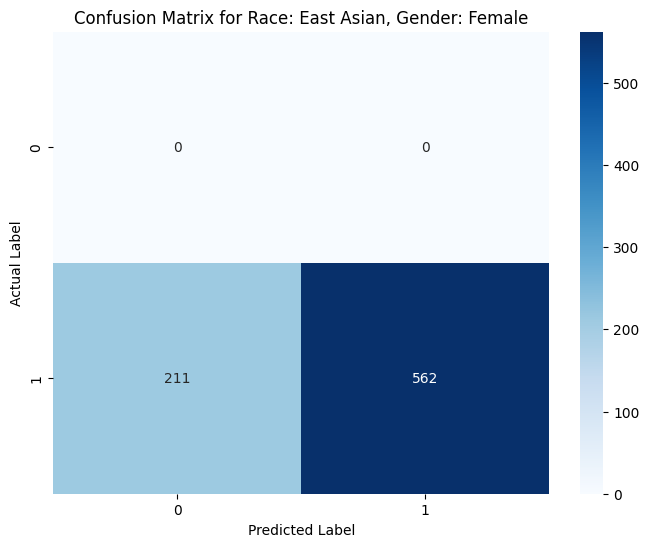

25/25 ━━━━━━━━━━━━━━━━━━━━ 1s 41ms/step
Accuracy for Race: East Asian, Gender: Male: 0.8133848133848134


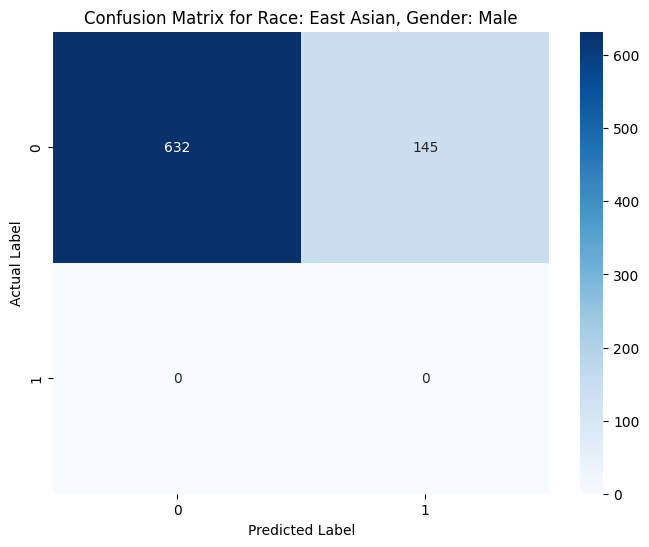

24/24 ━━━━━━━━━━━━━━━━━━━━ 1s 45ms/step
Accuracy for Race: Indian, Gender: Female: 0.6382699868938401


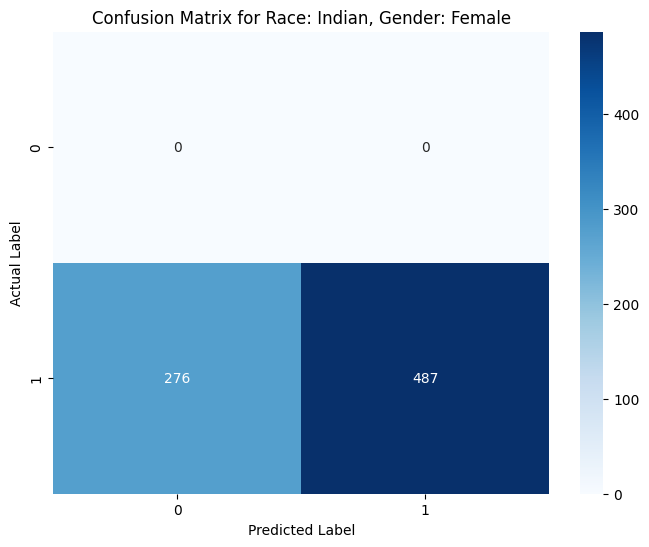

24/24 ━━━━━━━━━━━━━━━━━━━━ 1s 43ms/step
Accuracy for Race: Indian, Gender: Male: 0.8618857901726428


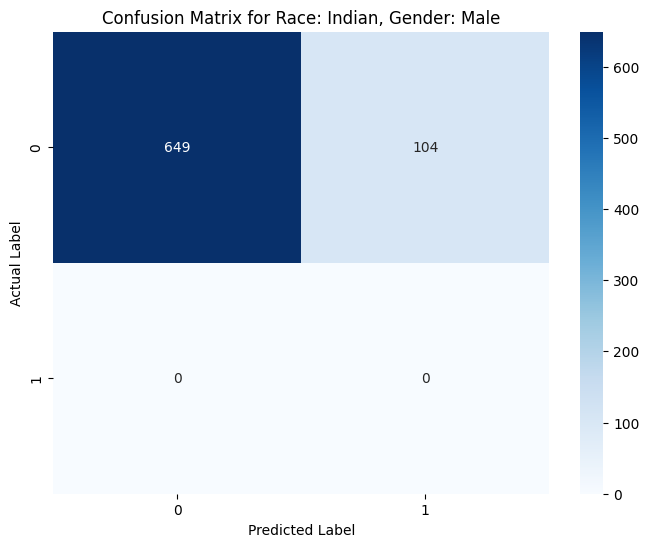

26/26 ━━━━━━━━━━━━━━━━━━━━ 1s 43ms/step
Accuracy for Race: Latino_Hispanic, Gender: Female: 0.7240963855421687


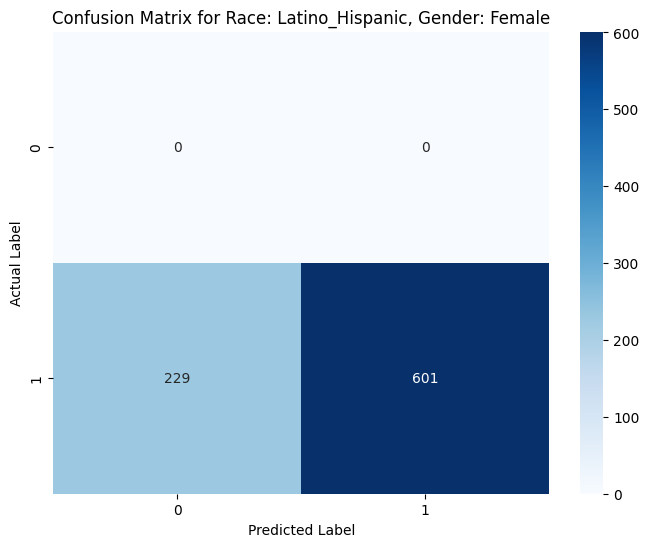

25/25 ━━━━━━━━━━━━━━━━━━━━ 1s 44ms/step
Accuracy for Race: Latino_Hispanic, Gender: Male: 0.8360655737704918


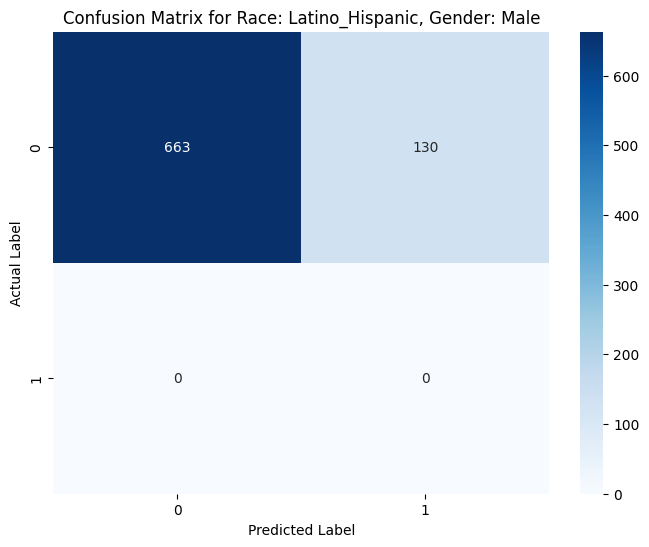

13/13 ━━━━━━━━━━━━━━━━━━━━ 1s 75ms/step
Accuracy for Race: Middle Eastern, Gender: Female: 0.7070707070707071


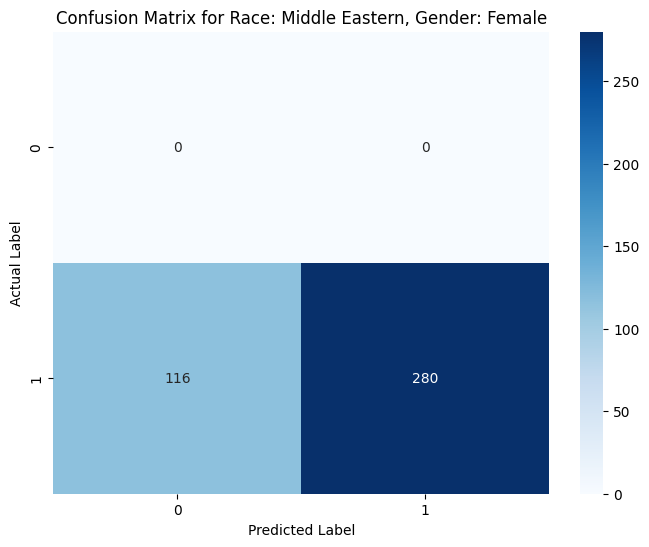

26/26 ━━━━━━━━━━━━━━━━━━━━ 1s 42ms/step
Accuracy for Race: Middle Eastern, Gender: Male: 0.8769987699876999


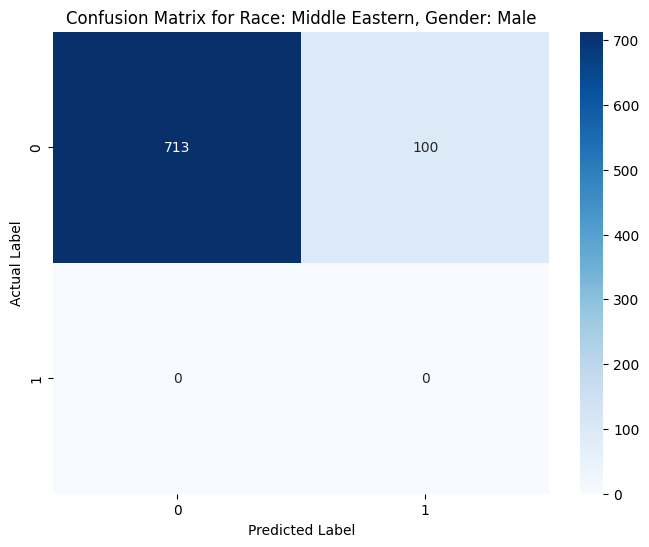

22/22 ━━━━━━━━━━━━━━━━━━━━ 1s 46ms/step
Accuracy for Race: Southeast Asian, Gender: Female: 0.7191176470588235


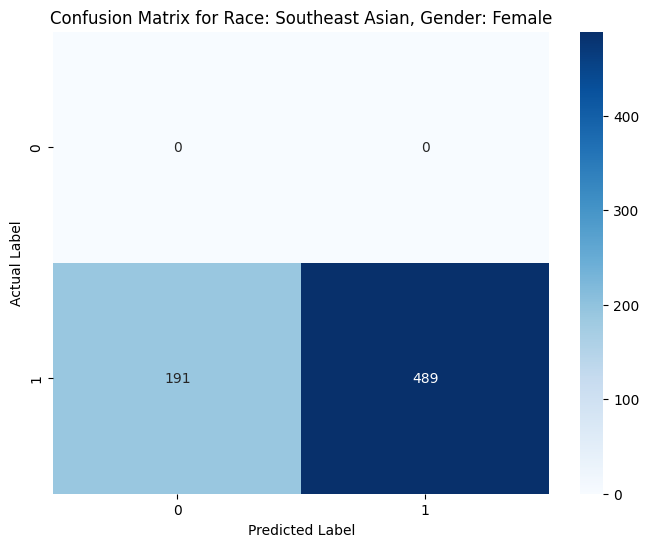

23/23 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step
Accuracy for Race: Southeast Asian, Gender: Male: 0.817687074829932


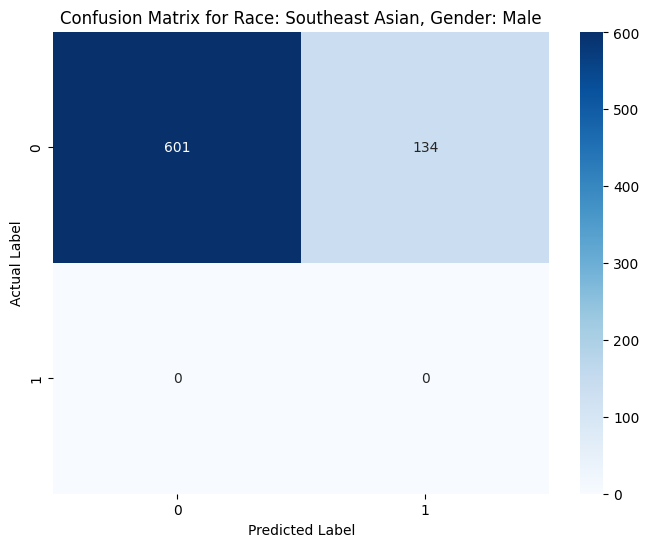

31/31 ━━━━━━━━━━━━━━━━━━━━ 1s 37ms/step
Accuracy for Race: White, Gender: Female: 0.7092419522326064


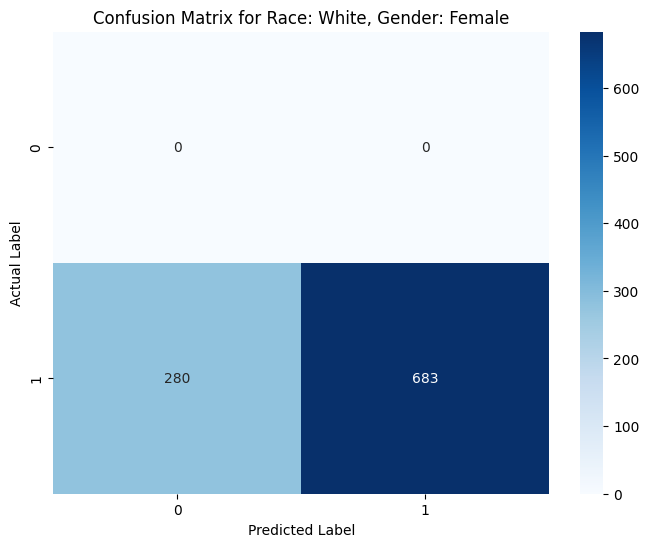

36/36 ━━━━━━━━━━━━━━━━━━━━ 1s 34ms/step
Accuracy for Race: White, Gender: Male: 0.8707664884135472


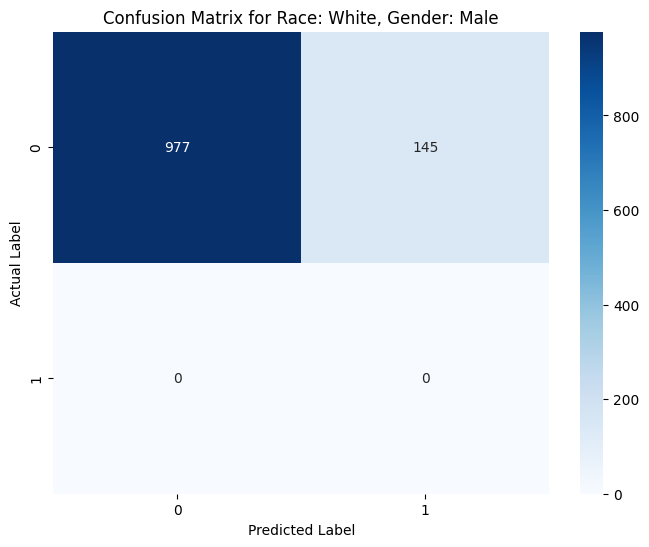

7/7 ━━━━━━━━━━━━━━━━━━━━ 1s 113ms/step
Accuracy for Age Group: 0-2: 0.6633165829145728


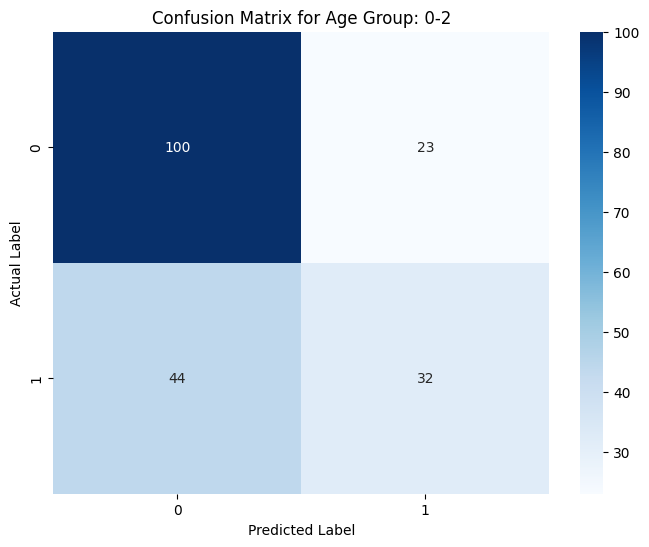

37/37 ━━━━━━━━━━━━━━━━━━━━ 1s 35ms/step
Accuracy for Age Group: 10-19: 0.6968670618120237


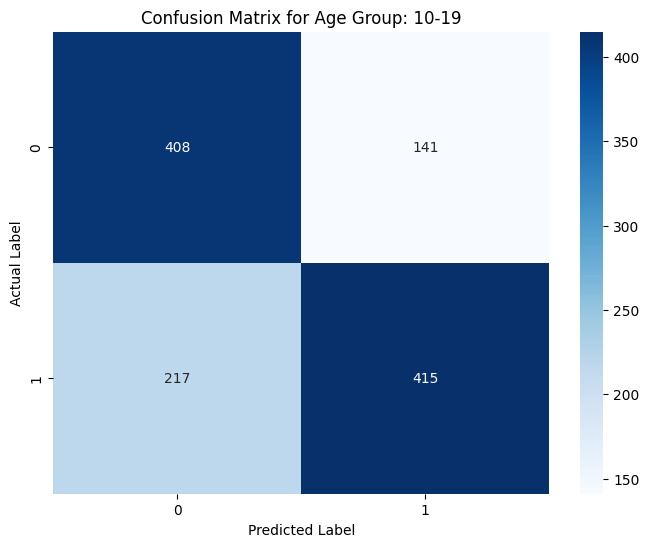

104/104 ━━━━━━━━━━━━━━━━━━━━ 2s 23ms/step
Accuracy for Age Group: 20-29: 0.7833333333333333


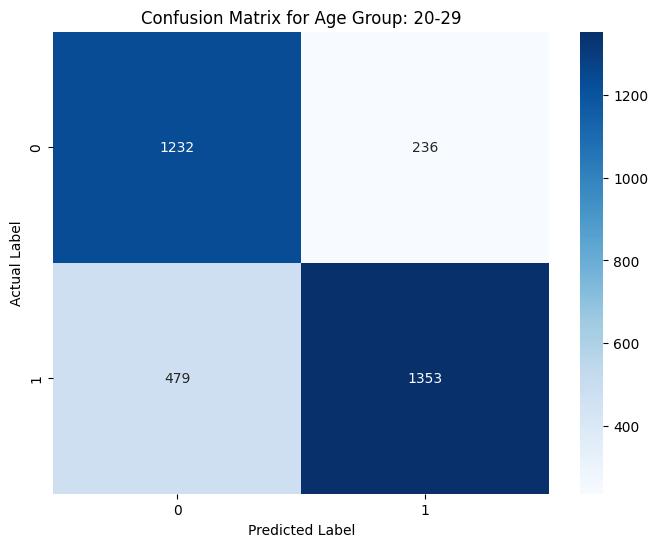

43/43 ━━━━━━━━━━━━━━━━━━━━ 1s 17ms/step
Accuracy for Age Group: 3-9: 0.698377581120944


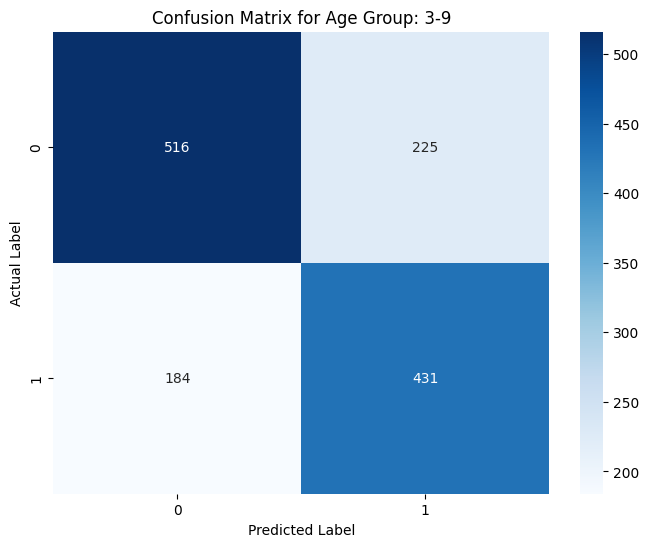

73/73 ━━━━━━━━━━━━━━━━━━━━ 2s 27ms/step
Accuracy for Age Group: 30-39: 0.8072961373390558


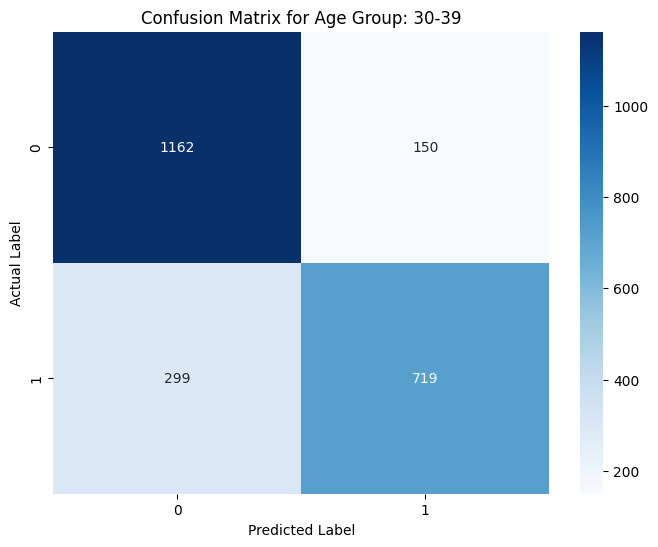

43/43 ━━━━━━━━━━━━━━━━━━━━ 1s 17ms/step
Accuracy for Age Group: 40-49: 0.8019216555801921


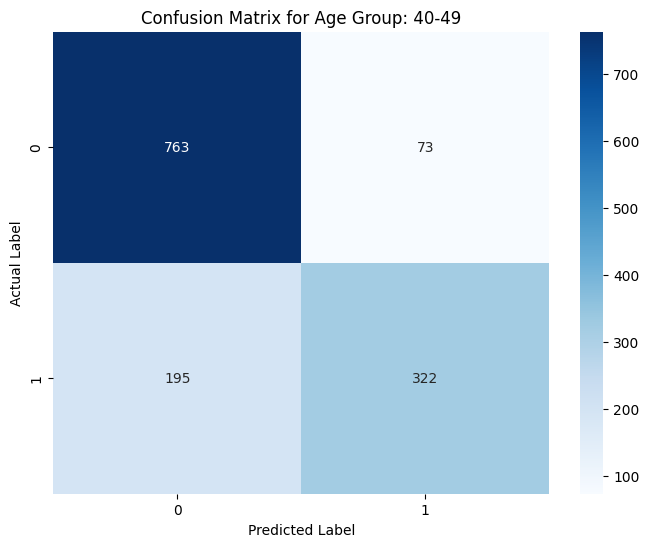

25/25 ━━━━━━━━━━━━━━━━━━━━ 1s 44ms/step
Accuracy for Age Group: 50-59: 0.8015075376884422


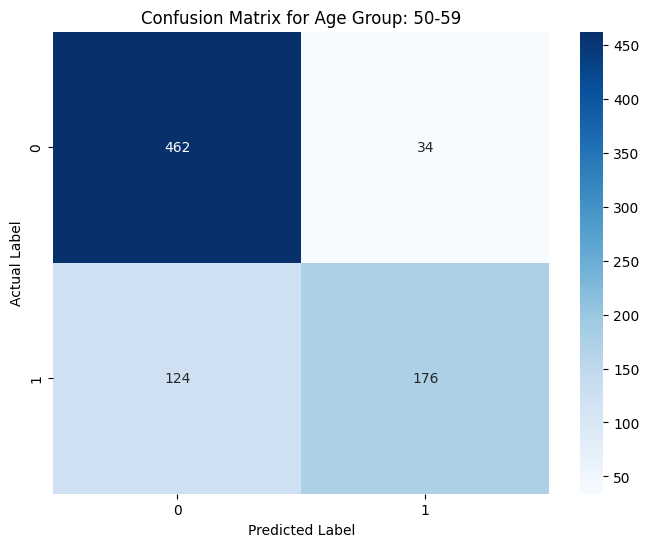

11/11 ━━━━━━━━━━━━━━━━━━━━ 1s 75ms/step
Accuracy for Age Group: 60-69: 0.7476635514018691


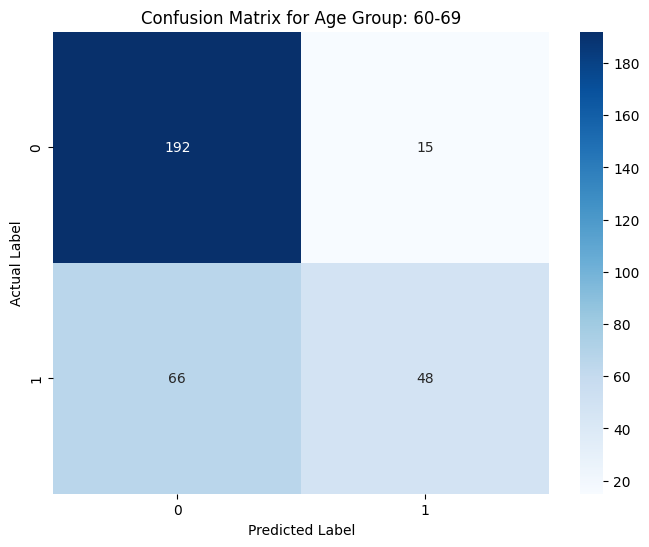

4/4 ━━━━━━━━━━━━━━━━━━━━ 1s 222ms/step
Accuracy for Age Group: more than 70: 0.5932203389830508


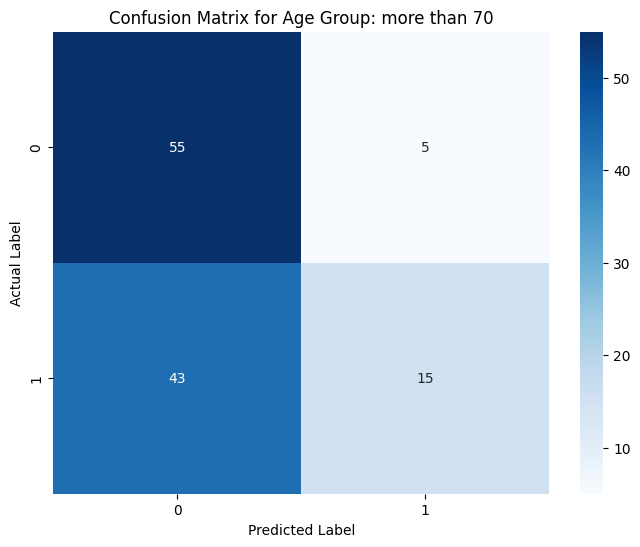

In [2]:
import tensorflow as tf
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix, accuracy_score
import seaborn as sns

# Update the model path here
dataset_path = '/home/cougarnet.uh.edu/tbahiru/Documents/data/orginal/'

# Load the trained model
model = tf.keras.models.load_model(dataset_path + 'my_model.h5')

# Define paths for test data
test_csv_file = dataset_path + 'test.csv'
test_images_path = dataset_path + 'val/'

# Load test dataset
test_df = pd.read_csv(test_csv_file)
test_df['file_path'] = test_images_path + test_df['file']

# Preprocess test images
def preprocess_image(file_path):
    image = tf.io.read_file(file_path)
    image = tf.image.decode_jpeg(image, channels=3)
    image = tf.image.resize(image, [224, 224])
    image = image / 255.0
    return image

# Prepare the test dataset
test_images = np.stack([preprocess_image(fp).numpy() for fp in test_df['file_path']])
test_labels = test_df['gender'].map({'Male': 0, 'Female': 1}).values

# Make predictions
predictions = model.predict(test_images)
predicted_classes = (predictions > 0.5).astype(int).flatten()

# Calculate overall accuracy
overall_accuracy = accuracy_score(test_labels, predicted_classes)
print("Overall Accuracy:", overall_accuracy)

# Confusion matrix for overall accuracy
cm = confusion_matrix(test_labels, predicted_classes)
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.title('Overall Confusion Matrix')
plt.ylabel('Actual Label')
plt.xlabel('Predicted Label')
plt.show()

# Analysis for each race and gender combination
for (race, gender), group_df in test_df.groupby(['race', 'gender']):
    group_images = np.stack([preprocess_image(fp).numpy() for fp in group_df['file_path']])
    group_labels = group_df['gender'].map({'Male': 0, 'Female': 1}).values
    group_predictions = model.predict(group_images)
    group_predicted_classes = (group_predictions > 0.5).astype(int).flatten()
    group_accuracy = accuracy_score(group_labels, group_predicted_classes)
    print(f"Accuracy for Race: {race}, Gender: {gender}: {group_accuracy}")

    # Confusion matrix for the race-gender group
    group_cm = confusion_matrix(group_labels, group_predicted_classes)
    plt.figure(figsize=(8, 6))
    sns.heatmap(group_cm, annot=True, fmt='d', cmap='Blues')
    plt.title(f'Confusion Matrix for Race: {race}, Gender: {gender}')
    plt.ylabel('Actual Label')
    plt.xlabel('Predicted Label')
    plt.show()

# Analysis for age groups (assuming age is already categorized; otherwise categorize as needed)
for age_group, group_df in test_df.groupby('age'):
    group_images = np.stack([preprocess_image(fp).numpy() for fp in group_df['file_path']])
    group_labels = group_df['gender'].map({'Male': 0, 'Female': 1}).values
    group_predictions = model.predict(group_images)
    group_predicted_classes = (group_predictions > 0.5).astype(int).flatten()
    group_accuracy = accuracy_score(group_labels, group_predicted_classes)
    print(f"Accuracy for Age Group: {age_group}: {group_accuracy}")

    # Confusion matrix for the age group
    group_cm = confusion_matrix(group_labels, group_predicted_classes)
    plt.figure(figsize=(8, 6))
    sns.heatmap(group_cm, annot=True, fmt='d', cmap='Blues')
    plt.title(f'Confusion Matrix for Age Group: {age_group}')
    plt.ylabel('Actual Label')
    plt.xlabel('Predicted Label')
    plt.show()


2024-05-01 21:52:01.483706: I tensorflow/core/platform/cpu_feature_guard.cc:210] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.
2024-05-01 21:52:02.019293: W tensorflow/compiler/tf2tensorrt/utils/py_utils.cc:38] TF-TRT Warning: Could not find TensorRT
2024-05-01 21:52:03.274336: I external/local_xla/xla/stream_executor/cuda/cuda_executor.cc:998] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero. See more at https://github.com/torvalds/linux/blob/v6.0/Documentation/ABI/testing/sysfs-bus-pci#L344-L355
2024-05-01 21:52:03.307510: I external/local_xla/xla/stream_executor/cuda/cuda_executor.cc:998] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero. 

 10/343 ━━━━━━━━━━━━━━━━━━━━ 6s 20ms/step

I0000 00:00:1714618354.722749    6608 device_compiler.h:188] Compiled cluster using XLA!  This line is logged at most once for the lifetime of the process.


343/343 ━━━━━━━━━━━━━━━━━━━━ 15s 29ms/step
Overall Accuracy: 0.7534234069746212


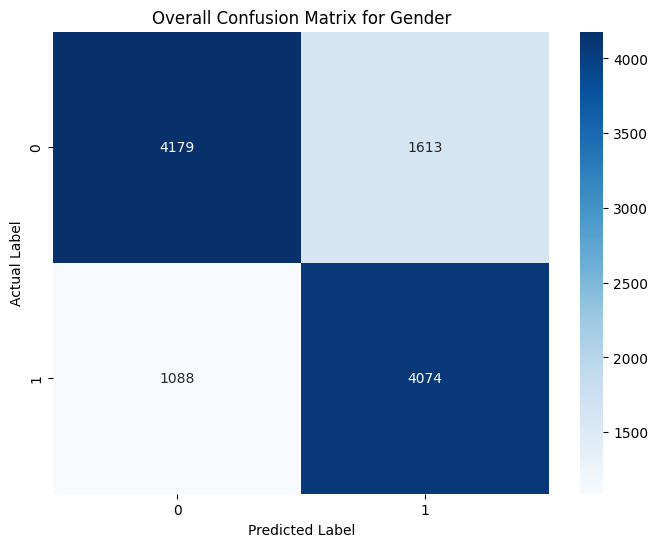

race             gender
Black            Female    0.693527
                 Male      0.672090
East Asian       Female    0.824062
                 Male      0.683398
Indian           Female    0.768021
                 Male      0.756972
Latino_Hispanic  Female    0.827711
                 Male      0.726356
Middle Eastern   Female    0.825758
                 Male      0.783518
Southeast Asian  Female    0.822059
                 Male      0.642177
White            Female    0.781931
                 Male      0.762923
dtype: float64
47/49 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step

I0000 00:00:1714618369.992983    6765 asm_compiler.cc:369] ptxas warning : Registers are spilled to local memory in function 'triton_gemm_dot_1150', 260 bytes spill stores, 260 bytes spill loads



49/49 ━━━━━━━━━━━━━━━━━━━━ 5s 102ms/step


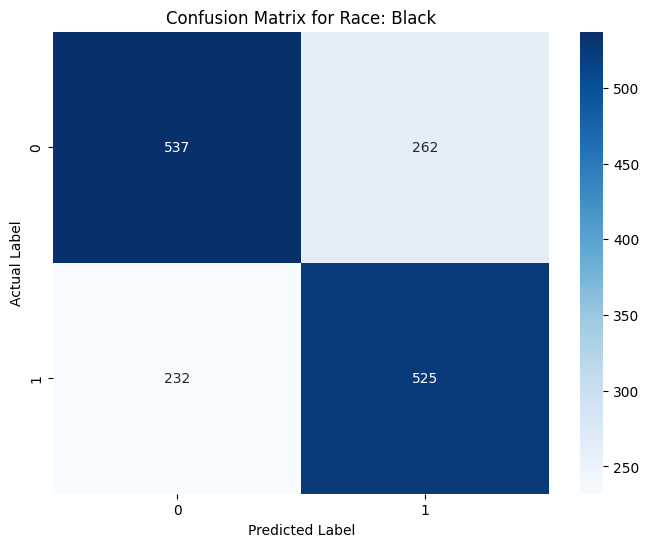

47/49 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step

I0000 00:00:1714618378.230848    6810 asm_compiler.cc:369] ptxas warning : Registers are spilled to local memory in function 'triton_gemm_dot_1150', 8 bytes spill stores, 8 bytes spill loads



49/49 ━━━━━━━━━━━━━━━━━━━━ 4s 92ms/step


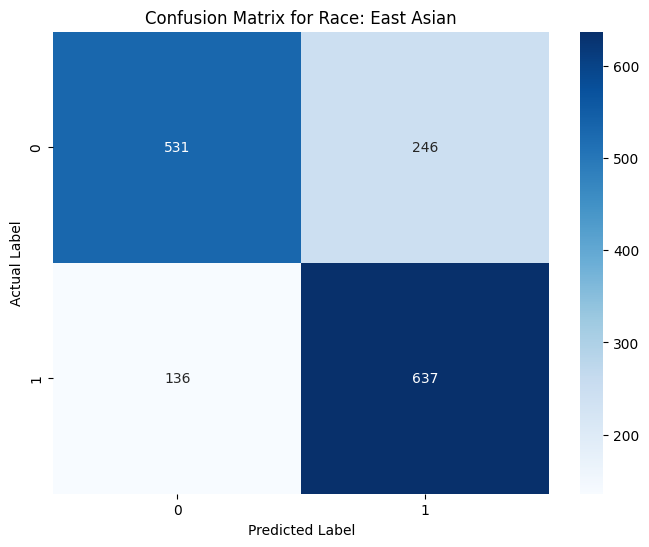

44/48 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step

I0000 00:00:1714618385.976524    6873 asm_compiler.cc:369] ptxas warning : Registers are spilled to local memory in function 'triton_gemm_dot_1150', 8 bytes spill stores, 8 bytes spill loads



48/48 ━━━━━━━━━━━━━━━━━━━━ 4s 91ms/step


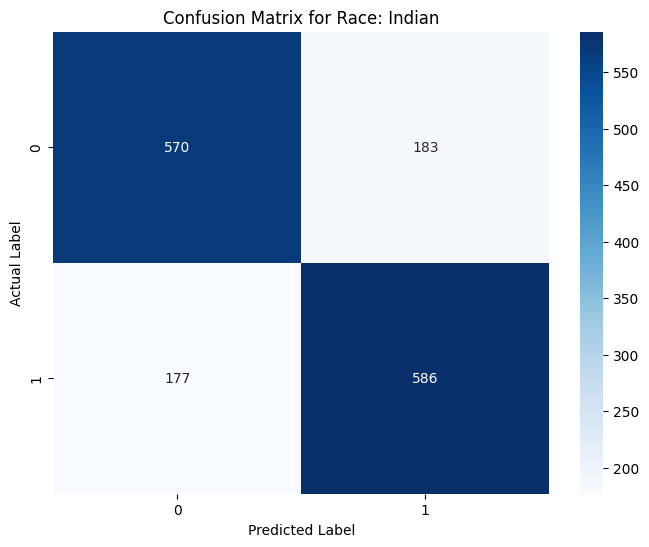

49/51 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step

I0000 00:00:1714618394.017340    6924 asm_compiler.cc:369] ptxas warning : Registers are spilled to local memory in function 'triton_gemm_dot_1150', 260 bytes spill stores, 260 bytes spill loads



51/51 ━━━━━━━━━━━━━━━━━━━━ 5s 101ms/step


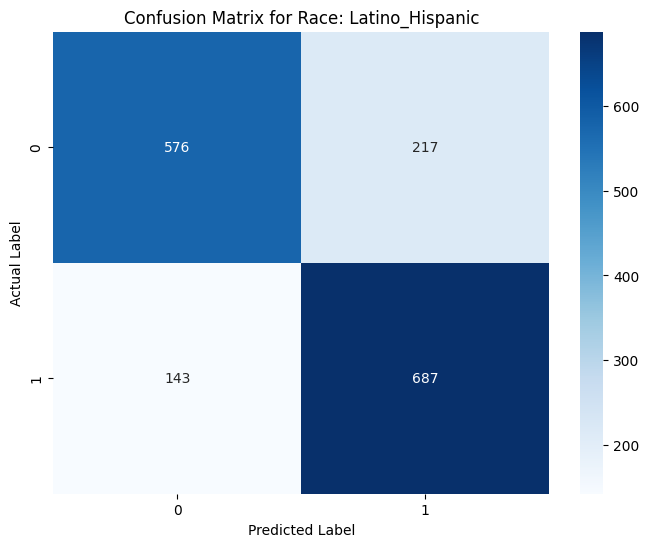

35/38 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step

I0000 00:00:1714618400.705306    6993 asm_compiler.cc:369] ptxas warning : Registers are spilled to local memory in function 'triton_gemm_dot_1150', 260 bytes spill stores, 260 bytes spill loads



38/38 ━━━━━━━━━━━━━━━━━━━━ 5s 131ms/step


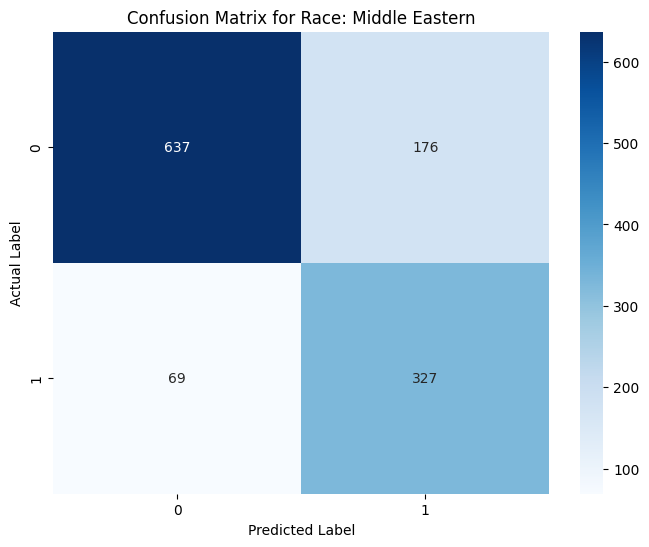

43/45 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step

I0000 00:00:1714618408.008716    7055 asm_compiler.cc:369] ptxas warning : Registers are spilled to local memory in function 'triton_gemm_dot_1150', 8 bytes spill stores, 8 bytes spill loads



45/45 ━━━━━━━━━━━━━━━━━━━━ 4s 91ms/step


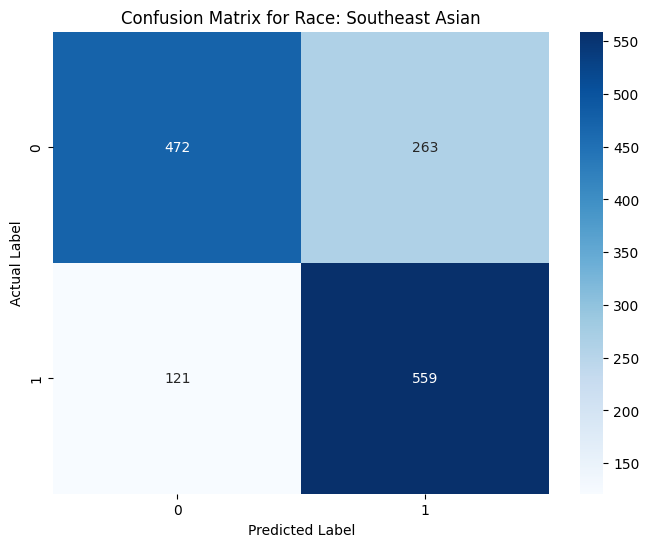

65/66 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step

I0000 00:00:1714618417.046444    7102 asm_compiler.cc:369] ptxas warning : Registers are spilled to local memory in function 'triton_gemm_dot_1150', 20 bytes spill stores, 20 bytes spill loads



66/66 ━━━━━━━━━━━━━━━━━━━━ 4s 66ms/step


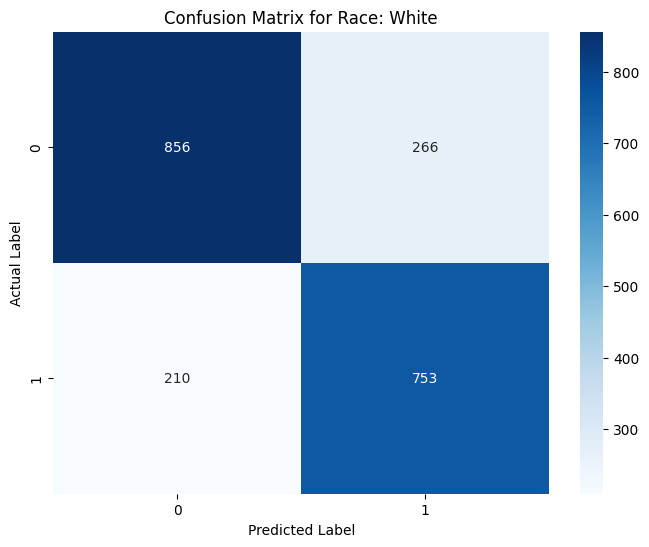

age
0-2             0.587940
10-19           0.699407
20-29           0.771515
3-9             0.663717
30-39           0.788841
40-49           0.792313
50-59           0.785176
60-69           0.775701
more than 70    0.677966
dtype: float64
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step


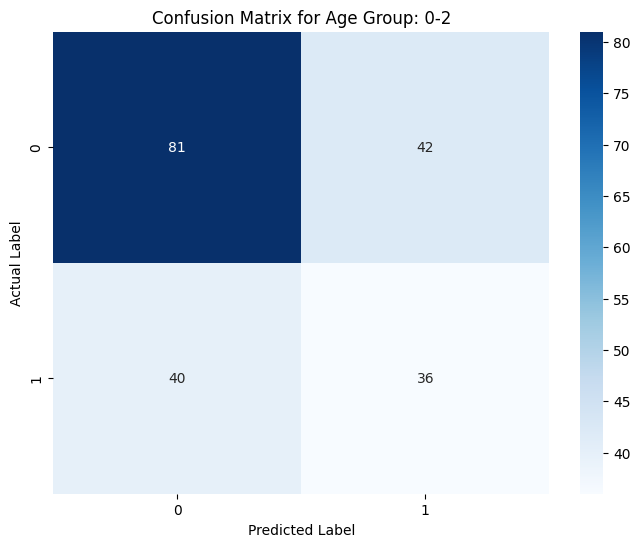

34/37 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step

I0000 00:00:1714618423.326037    7182 asm_compiler.cc:369] ptxas warning : Registers are spilled to local memory in function 'triton_gemm_dot_1150', 236 bytes spill stores, 236 bytes spill loads



37/37 ━━━━━━━━━━━━━━━━━━━━ 5s 142ms/step


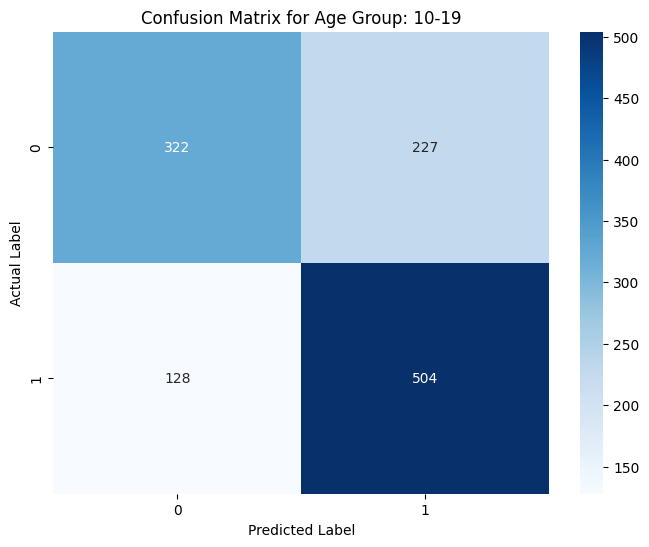

100/104 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step

I0000 00:00:1714618436.651696    7240 asm_compiler.cc:369] ptxas warning : Registers are spilled to local memory in function 'triton_gemm_dot_1150', 16 bytes spill stores, 16 bytes spill loads



104/104 ━━━━━━━━━━━━━━━━━━━━ 5s 48ms/step


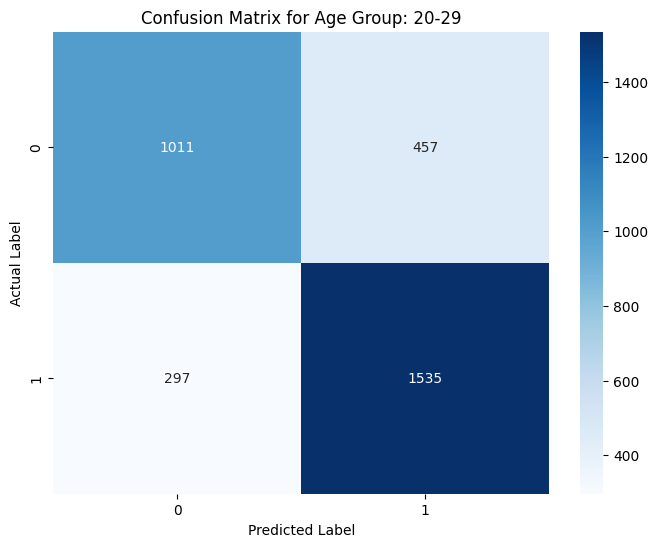

43/43 ━━━━━━━━━━━━━━━━━━━━ 1s 17ms/step


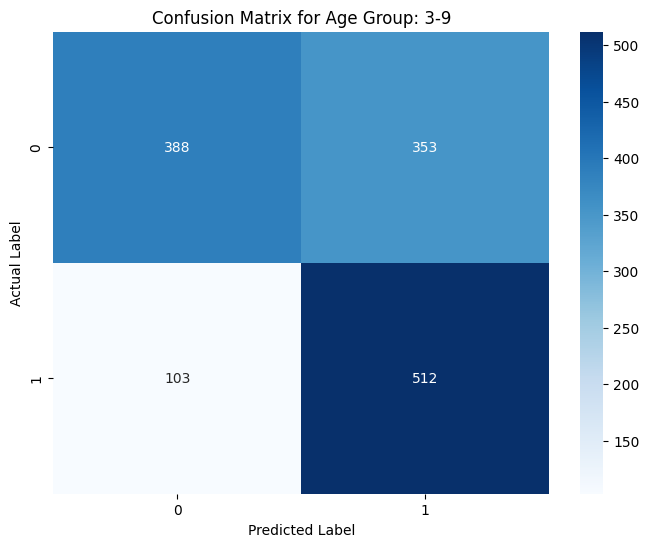

72/73 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step

I0000 00:00:1714618449.233023    7316 asm_compiler.cc:369] ptxas warning : Registers are spilled to local memory in function 'triton_gemm_dot_1150', 224 bytes spill stores, 224 bytes spill loads



73/73 ━━━━━━━━━━━━━━━━━━━━ 6s 78ms/step


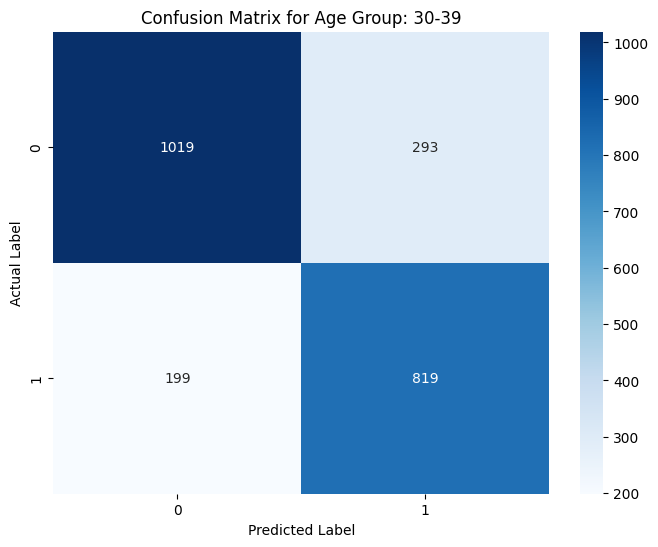

43/43 ━━━━━━━━━━━━━━━━━━━━ 4s 96ms/step


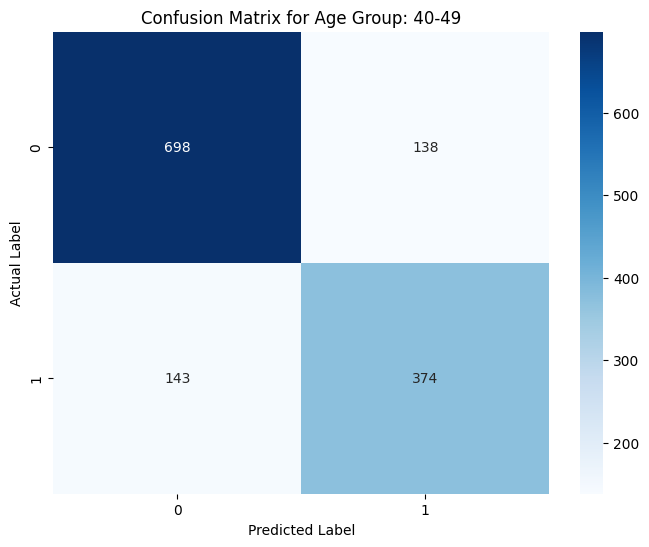

23/25 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step

I0000 00:00:1714618461.536265    7435 asm_compiler.cc:369] ptxas warning : Registers are spilled to local memory in function 'triton_gemm_dot_1150', 252 bytes spill stores, 252 bytes spill loads



25/25 ━━━━━━━━━━━━━━━━━━━━ 5s 202ms/step


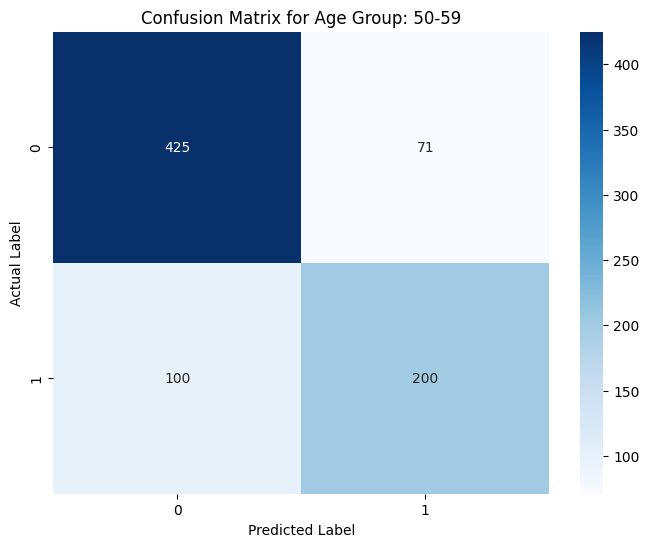

11/11 ━━━━━━━━━━━━━━━━━━━━ 3s 255ms/step


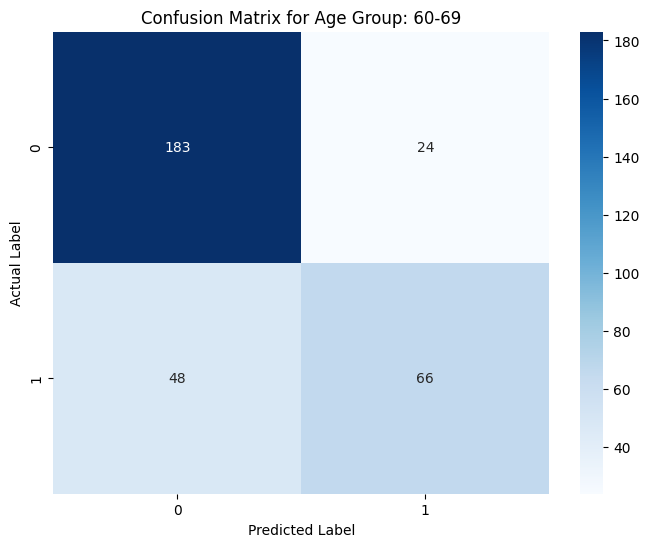

1/4 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step

I0000 00:00:1714618469.575873    7526 asm_compiler.cc:369] ptxas warning : Registers are spilled to local memory in function 'triton_gemm_dot_1150', 260 bytes spill stores, 260 bytes spill loads



4/4 ━━━━━━━━━━━━━━━━━━━━ 4s 1s/step 


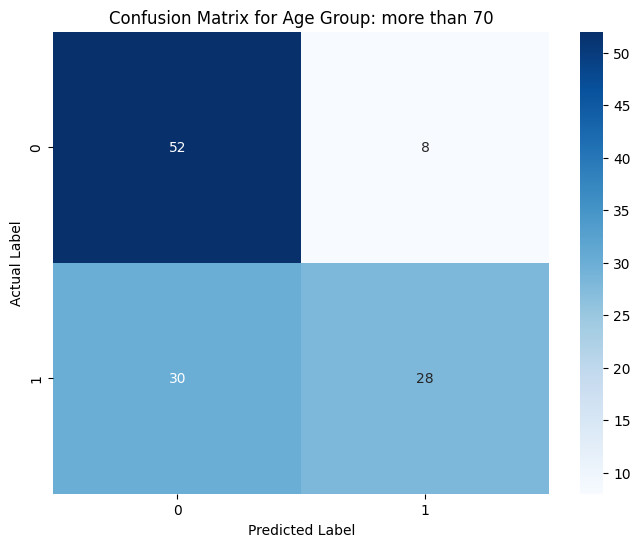

In [1]:
import tensorflow as tf
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix, accuracy_score
import seaborn as sns

# Update the model path here
dataset_path = '/home/cougarnet.uh.edu/tbahiru/Documents/data/orginal/'

# Load the trained model
model = tf.keras.models.load_model(dataset_path + 'model.h5')

# Define paths for test data
test_csv_file = dataset_path + 'test.csv'
test_images_path = dataset_path + 'val/'

# Load test dataset
test_df = pd.read_csv(test_csv_file)
test_df['file_path'] = test_images_path + test_df['file']

# Preprocess test images
def preprocess_image(file_path):
    image = tf.io.read_file(file_path)
    image = tf.image.decode_jpeg(image, channels=3)
    image = tf.image.resize(image, [224, 224])
    image = image / 255.0
    return image

# Prepare the test dataset
test_images = np.stack([preprocess_image(fp).numpy() for fp in test_df['file_path']])
test_labels = test_df['gender'].map({'Male': 0, 'Female': 1}).values

# Make predictions
predictions = model.predict(test_images)
predicted_classes = (predictions > 0.5).astype(int).flatten()

# Calculate overall accuracy and confusion matrix
overall_accuracy = accuracy_score(test_labels, predicted_classes)
print("Overall Accuracy:", overall_accuracy)

cm = confusion_matrix(test_labels, predicted_classes)
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.title('Overall Confusion Matrix for Gender')
plt.ylabel('Actual Label')
plt.xlabel('Predicted Label')
plt.show()

# Analyze accuracy by race and gender
race_gender_accuracy = test_df.copy()
race_gender_accuracy['predicted'] = predicted_classes
race_grouped = race_gender_accuracy.groupby(['race', 'gender']).apply(lambda x: accuracy_score(x['gender'].map({'Male': 0, 'Female': 1}), x['predicted']))
print(race_grouped)

# Confusion matrix for each race
for race, group_df in test_df.groupby('race'):
    group_images = np.stack([preprocess_image(fp).numpy() for fp in group_df['file_path']])
    group_labels = group_df['gender'].map({'Male': 0, 'Female': 1}).values
    group_predictions = model.predict(group_images)
    group_predicted_classes = (group_predictions > 0.5).astype(int).flatten()

    group_cm = confusion_matrix(group_labels, group_predicted_classes)
    plt.figure(figsize=(8, 6))
    sns.heatmap(group_cm, annot=True, fmt='d', cmap='Blues')
    plt.title(f'Confusion Matrix for Race: {race}')
    plt.ylabel('Actual Label')
    plt.xlabel('Predicted Label')
    plt.show()

# Analyze accuracy by age group
age_accuracy = test_df.copy()
age_accuracy['predicted'] = predicted_classes
age_grouped = age_accuracy.groupby('age').apply(lambda x: accuracy_score(x['gender'].map({'Male': 0, 'Female': 1}), x['predicted']))
print(age_grouped)

# Confusion matrix for each age group
for age_group, group_df in test_df.groupby('age'):
    group_images = np.stack([preprocess_image(fp).numpy() for fp in group_df['file_path']])
    group_labels = group_df['gender'].map({'Male': 0, 'Female': 1}).values
    group_predictions = model.predict(group_images)
    group_predicted_classes = (group_predictions > 0.5).astype(int).flatten()

    group_cm = confusion_matrix(group_labels, group_predicted_classes)
    plt.figure(figsize=(8, 6))
    sns.heatmap(group_cm, annot=True, fmt='d', cmap='Blues')
    plt.title(f'Confusion Matrix for Age Group: {age_group}')
    plt.ylabel('Actual Label')
    plt.xlabel('Predicted Label')
    plt.show()